<a href="https://colab.research.google.com/github/beaes/DataWorkshop-challenge-5/blob/master/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

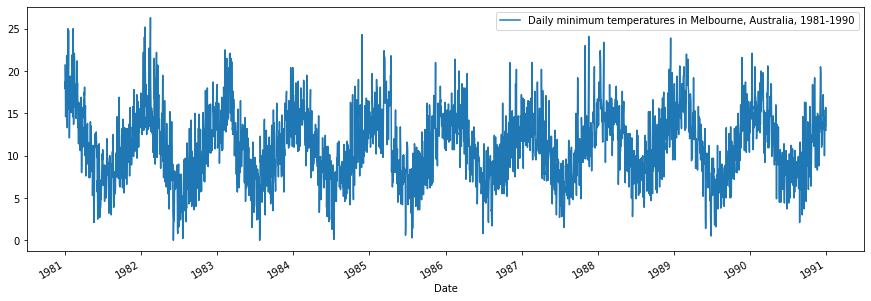

In [2]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15, 5));

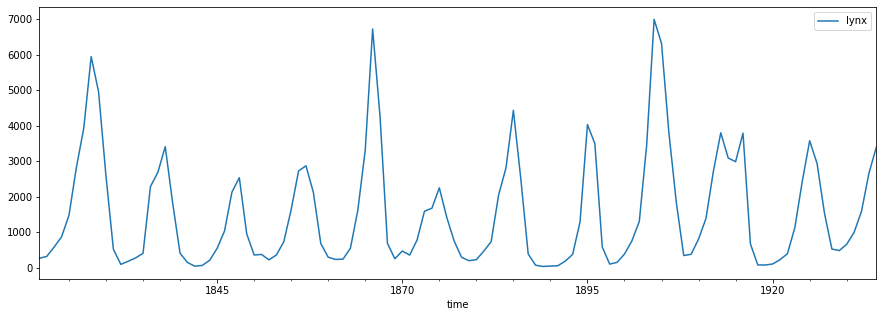

In [3]:
path ='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df.plot(figsize=(15, 5));

In [0]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df = pd.read_csv(path)

In [5]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [6]:
df.apply( lambda row: (int(row['year']), int(row['month']), int(row['day']) ), axis=1)

0        (1974, 5, 19)
1        (1974, 5, 26)
2         (1974, 6, 2)
3         (1974, 6, 9)
4        (1974, 6, 16)
             ...      
2316     (2018, 10, 7)
2317    (2018, 10, 14)
2318    (2018, 10, 21)
2319    (2018, 10, 28)
2320     (2018, 11, 4)
Length: 2321, dtype: object

In [0]:
df ['date'] = df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day']) ), axis=1)

df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
# bo chcemy miec takie wartosci przy wierszu 'year' ze zamiast -(1974,5,19)=> 1974-5-19 (czyli date z myslnikami otrzymujemy)

In [0]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])

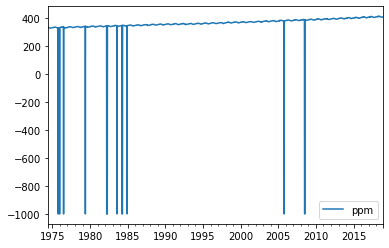

In [9]:
df [['ppm']].plot();

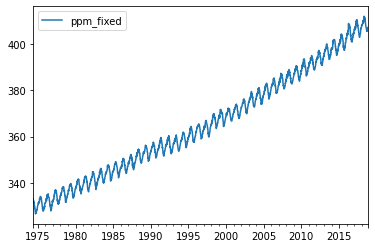

In [10]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna(method='backfill')
df[['ppm_fixed']].plot();
# funkcja fillna uzupelnia puste wartosci

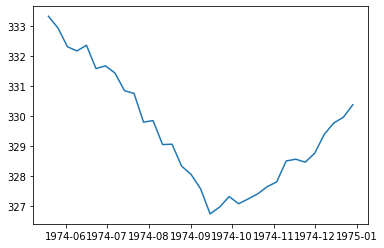

In [11]:
df1974 = df[df.year==1974]
plt.plot(df1974.index, df1974['ppm_fixed'])

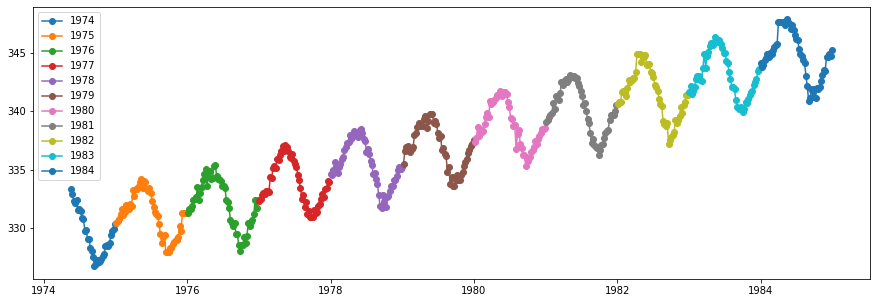

In [12]:
plt.figure(figsize=(15,5))
for year in range(1974, 1985):
  df_year = df[ df.year == year ]
  plt.plot(df_year.index, df_year['ppm_fixed'], '-o', label=year)
plt.legend();
# funkcja ktora pozwala pobawic sie kolorami troche